## What is the probability of rolling a total of 4 with 2 dice?

In [3]:
d = {(i,j):i+j for i in range(1,7) for j in range(1,7)} # 2 zar attığımızda toplamının 4 olma ihtimali
d  # önce tüm ihtimalleri yazdırdık

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

In [6]:
search_sum = 4  # toplamı 4 olanları bul. buraya kaç yazarsak onu hesaplar
l = []
for pairs, sums in d.items():
    if sums == 4:
        l.append(pairs)

l

[(1, 3), (2, 2), (3, 1)]

In [27]:
p = len(l)/len(d)  # 2 zar attığımda bu 2 zarın 4 olma ihtimalini hesapladık
p  # teorik olasılık

0.08333333333333333

## Law of Large Numbers (Büyük sayılar kanunu)
We can simulate a large number of values for X

In [8]:
import numpy as np
import pandas as pd

In [19]:
n = 100

In [20]:
np.random.seed(56)  # rastgele rakamlar sabitledik

In [21]:
np.random.seed(56)  # rastgele rakamlar sabitledik

die_1 = np.random.randint(1,7, size=n)
die_1

array([6, 5, 1, 3, 4, 3, 2, 4, 5, 2, 3, 2, 1, 5, 3, 4, 4, 1, 6, 2, 2, 3,
       5, 6, 6, 3, 5, 2, 4, 6, 2, 3, 3, 2, 1, 6, 5, 3, 5, 1, 1, 6, 5, 1,
       2, 4, 2, 6, 5, 4, 2, 6, 3, 3, 2, 4, 1, 1, 4, 3, 1, 4, 1, 6, 1, 1,
       1, 5, 3, 6, 1, 2, 5, 4, 3, 6, 1, 3, 3, 4, 2, 4, 4, 6, 1, 4, 5, 1,
       3, 6, 1, 5, 1, 4, 5, 3, 3, 5, 6, 1])

In [22]:
np.random.seed(66)  # rastgele rakamlar sabitledik

die_2 = np.random.randint(1,7, size=n)
die_2

array([5, 5, 4, 3, 6, 3, 6, 4, 3, 6, 1, 6, 6, 6, 4, 4, 3, 3, 1, 3, 3, 3,
       1, 4, 5, 1, 1, 2, 5, 3, 2, 1, 5, 5, 3, 3, 4, 1, 2, 5, 3, 3, 1, 4,
       1, 1, 3, 6, 2, 3, 5, 3, 6, 5, 4, 5, 5, 2, 6, 4, 4, 2, 3, 3, 2, 5,
       3, 3, 4, 3, 5, 3, 5, 5, 4, 5, 1, 3, 4, 4, 1, 6, 1, 1, 6, 5, 1, 2,
       6, 6, 5, 5, 3, 5, 5, 3, 4, 4, 3, 2])

In [23]:
X = die_1 + die_2
X

array([11, 10,  5,  6, 10,  6,  8,  8,  8,  8,  4,  8,  7, 11,  7,  8,  7,
        4,  7,  5,  5,  6,  6, 10, 11,  4,  6,  4,  9,  9,  4,  4,  8,  7,
        4,  9,  9,  4,  7,  6,  4,  9,  6,  5,  3,  5,  5, 12,  7,  7,  7,
        9,  9,  8,  6,  9,  6,  3, 10,  7,  5,  6,  4,  9,  3,  6,  4,  8,
        7,  9,  6,  5, 10,  9,  7, 11,  2,  6,  7,  8,  3, 10,  5,  7,  7,
        9,  6,  3,  9, 12,  6, 10,  4,  9, 10,  6,  7,  9,  9,  3])

In [25]:
df = pd.DataFrame({"die_1":die_1, "die_2":die_2, "X":X})
df.head()

,die_1,die_2,X
0,6,5,11
1,5,5,10
2,1,4,5
3,3,3,6
4,4,6,10


In [28]:
total_four = (X==4).sum()
total_four

12

In [31]:
# olasılığı hesaplayalım.
p = total_four / n

p  # olasılığın yukarda hesapladığımız teorik hesaplamadan farklı olduğunu gördük.
   # deneme sayımız az olduğu için teorik sonuca yaklaşamadık.

0.12

### rakamlarımızı artırırsak teorik olasılığa yaklaşırız. Deneyelim..

In [33]:
n = 10000  # 100'den 10000'e çıkardık

In [34]:
np.random.seed(56)  # aynı rakamlar

In [35]:
np.random.seed(56) 

die_1 = np.random.randint(1,7, size=n)
die_1

array([6, 5, 1, ..., 3, 3, 4])

In [36]:
np.random.seed(66)  

die_2 = np.random.randint(1,7, size=n)
die_2

array([5, 5, 4, ..., 5, 6, 1])

In [37]:
X = die_1 + die_2
X

array([11, 10,  5, ...,  8,  9,  5])

In [38]:
df = pd.DataFrame({"die_1":die_1, "die_2":die_2, "X":X})
df.head()

,die_1,die_2,X
0,6,5,11
1,5,5,10
2,1,4,5
3,3,3,6
4,4,6,10


In [39]:
total_four = (X==4).sum()
total_four

826

In [42]:
p = total_four / n
p  # teorik olasılığa (0.07) yaklaştık

0.0826

In [51]:
freq = df.X.value_counts()  # dağılım

freq

7     1657
8     1373
6     1369
9     1189
5     1094
10     854
4      826
3      558
11     542
2      282
12     256
Name: X, dtype: int64

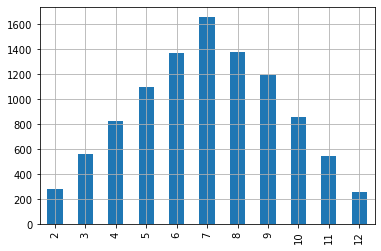

In [52]:
freq.sort_index().plot(kind="bar", grid=True);  # dağılım grafiği

In [47]:
prob = df.X.value_counts() / n  # olaslığını hesaplıyoruz
prob

7     0.1657
8     0.1373
6     0.1369
9     0.1189
5     0.1094
10    0.0854
4     0.0826
3     0.0558
11    0.0542
2     0.0282
12    0.0256
Name: X, dtype: float64

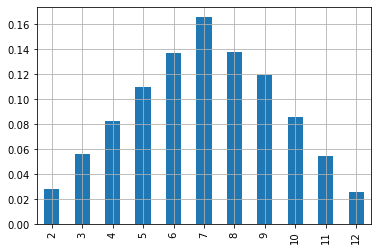

In [50]:
prob.sort_index().plot(kind="bar", grid=True);  # olasılığın grafiği

## What is the probability of rolling at least one 4 with 2 dice?

Zarlarınen az 1'inin 4 gelme olasılığı

In [57]:
d

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

In [58]:
11 / 36  # manuel olarak saydık

0.3055555555555556

In [56]:
count = 0
for i in d.keys():
    if 4 in i:
        count += 1

count  # kodlama ile hesapladık

11

In [59]:
count / len(d)  # olasılık

0.3055555555555556

## Conditional Probability

A restaurant noted what type of food its customers ordered last week. Here are the results:

Burger V Fries kümeleri

burger = 0.7
fries = 0.5
kesişim = 0.4

Find the probability that a randomly chosen customer ordered a burger given that they ordered fries.

P(B | F) = P(B n F) / P(F)

In [60]:
P_burger = 0.7

In [61]:
P_fries = 0.5

In [62]:
P_burger_and_fries = 0.4

In [63]:
P_burger_given_fries = P_burger_and_fries / P_fries

P_burger_given_fries

0.8

## Bayes' Theorem

Vera examined a random sample of deodorants distributed by her company. She found the following probabilities.

In [64]:
P_forMen = 0.55

In [65]:
P_botanicScent = 0.18

In [67]:
P_botanic_given_forMen = 1/11

Find the probability that a deodorant is for men, given that it has a botanic scent.



In [68]:
P_forMen_given_botanic = (P_forMen * P_botanic_given_forMen) / (P_botanicScent)

In [69]:
P_forMen_given_botanic  # verilen bilgilerden erkek olma olasılığı

0.2777777777777778